In [4]:
# Cellule 1 : imports + chemins
import pickle, json
from pathlib import Path
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

DATA_DIR = Path("news-portal-user-interactions-by-globocom")
EMB_PATH = DATA_DIR / "articles_embeddings.pickle"
OUTDIR   = pathlib.Path("./pca_out_nb")
OUTDIR.mkdir(parents=True, exist_ok=True)

DTYPE = "float32"     # ou "float64"
use_variance = 0.95   # ex: 0.95 pour 95% de variance
use_k = None          # ex: 100 si tu préfères fixer K


In [5]:
# Cellule 2 : chargement embeddings (formats souples)
with open(EMB_PATH, "rb") as f:
    X = pickle.load(f)     # directement np.ndarray (N,250)

X = X.astype(np.float32 if DTYPE=="float32" else np.float64, copy=False)
N, D = X.shape
print(f"Matrice chargée : {N} articles, dimension {D}")


Matrice chargée : 364047 articles, dimension 250


In [6]:
# Cellule 3 : ACP (variance cible OU K fixe)
n_components = use_k if use_k is not None else use_variance
pca = PCA(n_components=n_components, svd_solver="full", random_state=0)
X_pca = pca.fit_transform(X)
K = X_pca.shape[1]

exp_var = pca.explained_variance_ratio_
cum_exp_var = np.cumsum(exp_var)
total_kept = float(cum_exp_var[-1])
K, total_kept


(52, 0.9510907530784607)

In [8]:
# --- 3) Sauvegarde ---
with open(OUTDIR / "embeddings_pca.pkl", "wb") as f:
    pickle.dump(X_pca, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(OUTDIR / "pca_model.pkl", "wb") as f:
    pickle.dump(pca, f, protocol=pickle.HIGHEST_PROTOCOL)

report = {
    "N": int(N), "D": int(D), "K": int(K),
    "variance_expliquee_cumulee": total_kept,
    "variance_par_composante": exp_var.tolist()
}
(OUTDIR / "pca_report.json").write_text(json.dumps(report, indent=2), encoding="utf-8")

print("Fichiers écrits dans:", OUTDIR.resolve())


Fichiers écrits dans: /home/fabien/Info/Projet_10/pca_out_nb


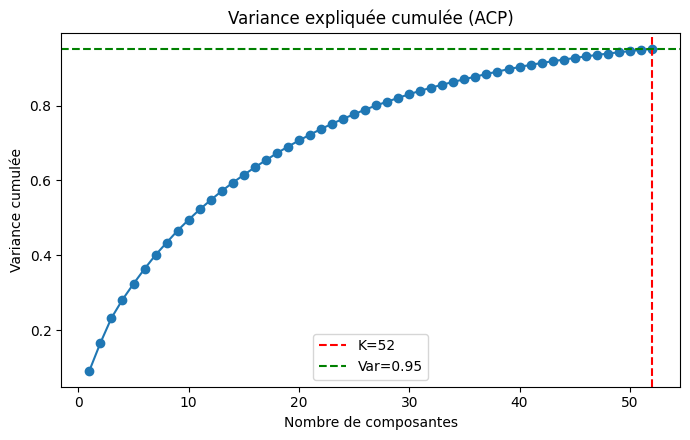

In [9]:
# --- 4) Graphe de la variance cumulée ---
plt.figure(figsize=(7,4.5))
x = np.arange(1, len(cum_exp_var)+1)
plt.plot(x, cum_exp_var, marker="o")
plt.axvline(K, linestyle="--", color="red", label=f"K={K}")
plt.axhline(total_kept, linestyle="--", color="green", label=f"Var={total_kept:.2f}")
plt.title("Variance expliquée cumulée (ACP)")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance cumulée")
plt.legend()
plt.tight_layout()
plt.show()
